<a href="https://colab.research.google.com/github/AHernandez527/ProyectoInteligenciaAritificial_HERNANDEZ_JIMENEZ/blob/main/Proyecto_Final_JJim%C3%A9nez_AHern%C3%A1ndez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final
##Estudiantes:
*   Juan Pablo Jiménez Anderson        | 2018099431  
*   Adriana Vanessa Hernández Calderón | 2019380075


#!pip install's

In [ ]:
!pip install category_encoders

#Librerias

In [ ]:
import pandas as pd                                                             # Importa Pandas para manejo de datos
import numpy as np                                                              # Importa numpy para manejo de arrays
from numpy import exp, array, random, dot                                       # Importa funciones utiles de numpy
from sklearn import preprocessing                                               # Importa sklearn que es útil en redes neuronales
from sklearn.model_selection import train_test_split                            # Importa herramienta para separar los datos
import matplotlib.pyplot as plt                                                 # Importa matplot para visualizaciones gráficas
import seaborn as sns                                                           # Para visualización
%matplotlib inline
sns.set(color_codes=True)
import category_encoders as ce
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

#Proyecto Final Inteligencia Artificial
Enunciado: Se presenta una serie de datos estadísticos relativos a un conjunto de personas, organizados de tal forma que
son la base que permite generar soluciones que predigan los ingresos de dichos individuos (en base a dos
categorías: superiores o inferiores a 50.000 USD al año). Sobre la base de dichos datos han de establecer
ustedes:


1.   Un clasificador de datos que permita dicha predicción, usando ustedes el paradigma de IA que consideren
más adecuado

2.   Realicen un estudio EVIDENCIADO Y ARGUMENTADO que permita clasificar los diferentes atributos en
función de su importancia para el resultado final, en el caso anterior. En función de los 5 que hayan resultado
mejores en dicha clasificación, generen un árbol de decisión y comparen los resultados con los del apartado 1

3. Diseñen un segundo clasificador basado en un paradigma diferente al anterior, y comparen los resultados
obtenidos con los del apartado 1



## DataFrame
Para crear un clasificador, el paradigma de Inteligencia artificial que mejores resultados ha mostrado a lo largo del curso ha sido redes del tipo MLP con un aprendizaje supervisado. El set de dtaos que se facilita está compuesto por 32561 instancias de 15 atributos los cuales se listan a continuación

*   Age
*   workclass
*   fnlwgt
*   education
*   education-num
*   marital-status
*   ocupation
*   relationship
*   race
*   sex
*   capital-gain
*   capital-loss
*   hours-per-week
*   native-country
* '>50K, <=50K '

De estos 15 atributos, el último de ellos se considerará label y los 14 restantes se consideraran features

###Manejo de los datos
Primeramente se deben importar los datos que se dan en el sitio indicado, denominados ***Census Income Data Set***, estos datos se importarán a los archivos del notebook y se manipularán de manera que tengan la forma optima para introducirlos a la red.

#### Importación de los datos

In [ ]:
from pydrive.auth import GoogleAuth                                              # Importa librerias necesarias para importar de drive y realiza autentificación
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1iqIA3aG-Tdia0-BIn3_CFcG8x8WCJfQQ"})       # Ingresar ID del archivo (se obtiene Javascript en buscador)
downloaded.GetContentFile('adult.data')                                         # Ingresar Nombre del archivo

####Organización de los datos (asignación de labels a columna)

In [ ]:
data = pd.read_csv(                                                             # Se lee con pandas un archivo csv
    "/content/adult.data",
    names=["Age", "workclass", "fnlwgt", "education","education-num",
           "marital-status", "ocupation", "relationship", "race", "sex", 
           "capital-gain", "capital-loss", "hours-per-week", "native-country", 
           "income"])                                                           # Se separan cada uno de los datos con un tag.

In [ ]:
data.shape

(32561, 15)

###EDA
El exploratory data analysis se utiliza para corroborar que los datos que se introducen a la red no vayan a causar un problema de ejecución.

In [ ]:
df = data
df.dtypes                                                                       # Permite observar el tipo de datos

Age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
ocupation         object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

En el conjunto de datos, puede darse el caso de que existan filas que se repitan, por lo que para evitar datos adicionale innecesarios se eliminarán 

In [ ]:
df.shape                                                                        # Muestra la forma del conjunto

(32561, 15)

####Análisis de duplicados

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("Filas duplicadas: ", duplicate_rows_df.shape)

Filas duplicadas:  (24, 15)


In [ ]:
df.count()                                                                      # Cuenta cuantos elementos por columna hay

Age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
ocupation         32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64

De las 32561 filas, se eliminaran las 24 filas duplicadas

In [ ]:
df= df.drop_duplicates()                                                        # Hace un drop a las filas duplicadas

In [ ]:
df.count()                                                                      # Vuelve a contar los elementos por columna

Age               32537
workclass         32537
fnlwgt            32537
education         32537
education-num     32537
marital-status    32537
ocupation         32537
relationship      32537
race              32537
sex               32537
capital-gain      32537
capital-loss      32537
hours-per-week    32537
native-country    32537
income            32537
dtype: int64

####Análisis de faltantes y nulos

Una vez se han eliminado las filas duplicadas, se procede a ubicar y eliminar valores faltantes o nulos

In [ ]:
print(df.isnull().sum())                                                        # Identifica los valores nulos de cada una de las columnas

Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
ocupation         0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Como no se tienen valores nulos, no es necesario eliminarlos. el paso siguiente es identificar los valores que se salen del rango, por ejemplo, una edad o muy alta, o muy baja, etc. Primero se mostrará un head para observar como se ve el set de datos.

In [ ]:
df.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,ocupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


####Anális de outliers

Ahora se muestra la distribución de los datos numéricos para identificar si existen datos fuera de los límites

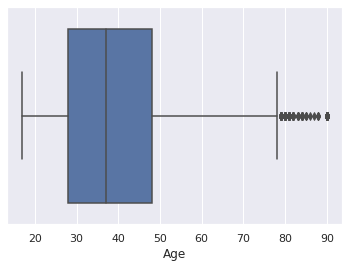

In [ ]:
sns.boxplot(x=df["Age"])

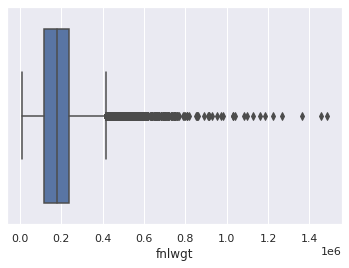

In [ ]:
sns.boxplot(x=df['fnlwgt'])

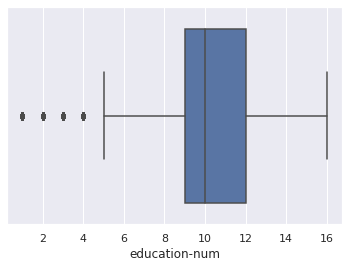

In [ ]:
sns.boxplot(x=df['education-num'])

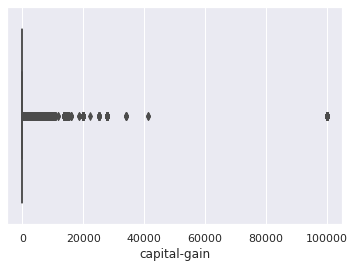

In [ ]:
sns.boxplot(x=df['capital-gain'])

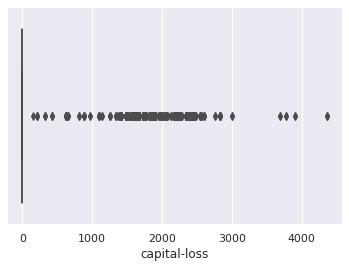

In [ ]:
sns.boxplot(x=df['capital-loss'])

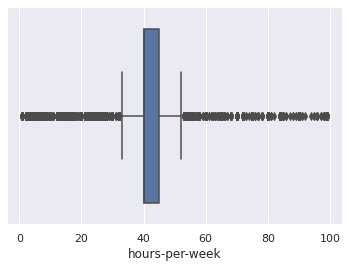

In [ ]:
sns.boxplot(x=df['hours-per-week'])

In [ ]:
Q1 = df.quantile(0.05)                                                          # Determina el cuantil 1 en 5%
Q3 = df.quantile(0.95)                                                          # Determina el cuantil 1 en 95%
IQR = Q3 - Q1
print(IQR)

Age                   44.0
fnlwgt            340236.0
education-num          9.0
capital-gain        5013.0
capital-loss           0.0
hours-per-week        42.0
dtype: float64


In [ ]:
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]        # Elimina alrededor del 10% de los datos, 5% en cada extremo.
df.shape

(30291, 15)

Estos outliers que se eliminaron se pueden observar en los gráficos de caja, donde el primero muestra al set original, y los segundos al nuevo set.

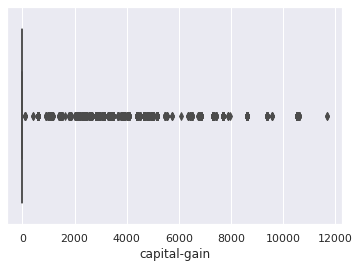

In [ ]:
sns.boxplot(x=df['capital-gain'])

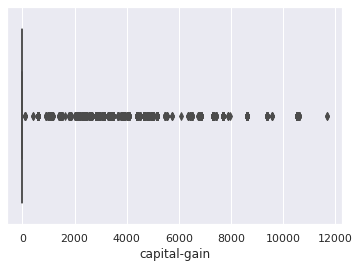

In [ ]:
sns.boxplot(x=df['capital-gain'])

###OrdinalEncoder: Codificacion de categorical features
Utilizar un método de codificación para las características no numéricas permite que la red sea capaz de entender qué es lo que sucede y tomar desiciones a partir de ello

Ahora, para codificar los features en los que es necesario hacerlo, los cuales son

*   workclass
*   education
*   marital-status
*   ocupation
*   race
*   sex
*   hours-per-week
*   native-country
*   income


In [ ]:
df.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,ocupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.shape

(30291, 15)

Algunas características de los datos se pueden observar a continiación:

#####Workclass

In [ ]:
df['workclass'].value_counts()

 Private             21256
 Self-emp-not-inc     2304
 Local-gov            1936
 ?                    1759
 State-gov            1216
 Self-emp-inc          916
 Federal-gov           883
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

#####Education

In [ ]:
df['education'].value_counts()

 HS-grad         9994
 Some-college    6914
 Bachelors       4797
 Masters         1460
 Assoc-voc       1307
 11th            1138
 Assoc-acdm       995
 10th             900
 7th-8th          622
 9th              504
 12th             421
 Prof-school      394
 5th-6th          321
 Doctorate        315
 1st-4th          162
 Preschool         47
Name: education, dtype: int64

#####Marital Status

In [ ]:
df['marital-status'].value_counts()

 Married-civ-spouse       13487
 Never-married            10260
 Divorced                  4201
 Separated                  983
 Widowed                    940
 Married-spouse-absent      397
 Married-AF-spouse           23
Name: marital-status, dtype: int64

#####Ocupation

In [ ]:
df['ocupation'].value_counts()

 Craft-repair         3855
 Adm-clerical         3613
 Prof-specialty       3611
 Exec-managerial      3536
 Sales                3359
 Other-service        3212
 Machine-op-inspct    1928
 ?                    1766
 Transport-moving     1508
 Handlers-cleaners    1333
 Farming-fishing       947
 Tech-support          859
 Protective-serv       612
 Priv-house-serv       144
 Armed-Forces            8
Name: ocupation, dtype: int64

#####Relationship

In [ ]:
df['relationship'].value_counts()

 Husband           11866
 Not-in-family      7807
 Own-child          4935
 Unmarried          3321
 Wife               1413
 Other-relative      949
Name: relationship, dtype: int64

#####Race

In [ ]:
df['race'].value_counts()

 White                 25806
 Black                  2970
 Asian-Pac-Islander      958
 Amer-Indian-Eskimo      298
 Other                   259
Name: race, dtype: int64

#####Sex

In [ ]:
df['sex'].value_counts()

 Male      20034
 Female    10257
Name: sex, dtype: int64

#####Native Country

In [ ]:
df['native-country'].value_counts()

 United-States                 27111
 Mexico                          628
 ?                               529
 Philippines                     184
 Germany                         126
 Puerto-Rico                     110
 Canada                          109
 El-Salvador                     102
 Cuba                             91
 India                            89
 England                          83
 Jamaica                          79
 Italy                            71
 South                            69
 Dominican-Republic               68
 China                            67
 Vietnam                          62
 Guatemala                        61
 Poland                           58
 Japan                            57
 Columbia                         57
 Taiwan                           46
 Haiti                            42
 Portugal                         37
 Iran                             35
 Nicaragua                        32
 Peru                             30
 

####Income

In [ ]:
df['income'].value_counts()

 <=50K    23928
 >50K      6363
Name: income, dtype: int64

####Codificación

In [ ]:
ordinal = ce.OrdinalEncoder(cols=['workclass','education','marital-status',     # Indica que columnas deben ser codificadas
                                  'ocupation','relationship', 'race', 'sex',
                                  'native-country', 'income'])
df_encoded = ordinal.fit_transform(df)                                          # Codifica

In [ ]:
df_encoded.head()                                                               # Muestra codificación de los datos

,Age,workclass,fnlwgt,education,education-num,marital-status,ocupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,1,77516,1,13,1,1,1,1,1,2174,0,40,1,1
1,50,2,83311,1,13,2,2,2,1,1,0,0,13,1,1
2,38,3,215646,2,9,3,3,1,1,1,0,0,40,1,1
3,53,3,234721,3,7,2,3,2,2,1,0,0,40,1,1
4,28,3,338409,1,13,2,4,3,2,2,0,0,40,2,1


In [ ]:
df_encoded.dtypes                                                               # Verifica que todos los datos sean de tipo numérico

Age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
ocupation         int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
income            int64
dtype: object

###Split de datos
Una vez separados los datos se puede separar en porciones de validación y aprendizaje para los casos donde se requiera, comunmente se utiliza la proporción 80/20, donde el 80% de los datos del dataset se utiliza para entrenar y el 20% para probar la red. Para esto, se separarán los datos aleatoriamente haciendo uso de la herramienta que SciKit learn nos provee

In [ ]:
df_train, df_test = train_test_split(df_encoded, test_size = 0.20,
                                     random_state = 42)

In [ ]:
df_train.shape

(24232, 15)

In [ ]:
df_test.shape

(6059, 15)

###Separación de Labels y Features
Mediante la manipulacion de los dataframe de pandas, se establecen pares ordenados, siendo X los features y Y los labels para entrenamiento y validación de la red y estos al estar ya codificados, pueden transformarse en un numpy array para ser introducidos a las redes

####Datos de entrenamiento

In [ ]:
x_train = df_train.copy()
y_train = x_train.pop('income')                                                 # Separa income, el label o resultado, del dataframe de pandas por lo que se obtiene el conjunto X y Y

In [ ]:
x_train.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,ocupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
4373,35,3,111128,12,6,1,1,4,1,1,0,0,40,1
8119,34,2,312197,2,9,2,8,2,1,1,0,0,75,6
19198,40,3,145160,10,16,2,4,2,1,1,0,0,40,1
11225,26,3,158810,1,13,1,4,1,1,1,0,0,70,1
27200,39,3,53926,1,13,2,4,2,1,1,0,0,40,1


In [ ]:
y_train.head()

4373     1
8119     2
19198    2
11225    1
27200    1
Name: income, dtype: int64

In [ ]:
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

####Datos de validación o testeo

In [ ]:
x_test = df_test.copy()
y_test = x_test.pop('income')                                                   # Separa income, el label o resultado, del dataframe de pandas por lo que se obtiene el conjunto X y Y

In [ ]:
x_test.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,ocupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
15256,74,6,29887,2,9,7,12,1,1,2,0,0,10,1
17396,58,3,371064,2,9,2,9,2,1,1,0,0,20,1
239,23,3,115458,2,9,1,8,4,1,1,0,0,40,1
20445,24,3,153583,6,10,1,6,4,1,2,0,0,40,1
6979,63,3,108097,6,10,2,7,2,1,1,10566,0,45,1


In [ ]:
y_test.head()

15256    1
17396    1
239      1
20445    1
6979     1
Name: income, dtype: int64

In [ ]:
x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()

##Sets de datos por utilizar
De todo el procedimiento realizado al dataframe, se obtiene lo siguiente:

*   x_train_np    -->    Set de features de entrenamiento 
*   y_train_np    -->    Set de labels de entrenamiento 
*   x_test_np    -->    Set de features de validación 
*   y_test_np    -->    Set de labels de validación 

Estos datos se dividieron con un formato 80/20 de manera que el 80% del dataset se almacenó en los denominados "train" y el 20% complementario en los denominados "test"



##Punto 1: Clasificador de datos utilizando una red del tipo MLP 
Se decidió que el paradigma que mejor se adapta para clasificar los datos corresponde a una red MLP, en donde, se sabe de antemano que tendrá una capa de entrada de 14 neuronas y una capa de salida de una sola neurona, por su parte la cantidad de capas ocultas se definirá según el comportamiento de la red, así como el resto de sus hiperparámetros.

###Pruebas de la red neurona
Se tiene una red MLP, a la que se le realizan pruebas con distintos hiperparámetros para definir cual combinación de los mismos se ajusta al dataset.

Para seleccionar cual configuración de hiperparámetros se ajusta mejor y arroja mejores resultados se realizaron distintas pruebas las cuales se listan en la tabla a continuación, de estas se seleccionó la que mejores resultados arrojó
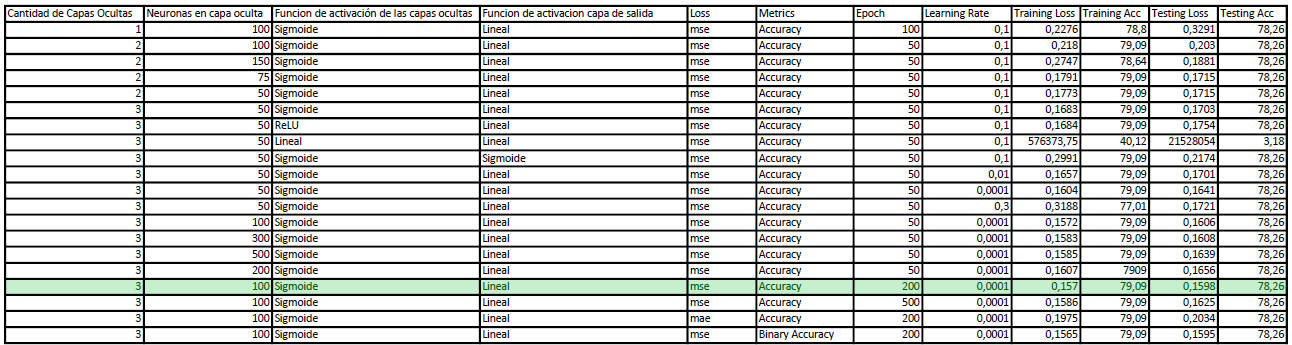

In [ ]:
neur = 100
activ = 'sigmoid'
model = keras.Sequential()
model.add(Dense(neur, input_dim=14,activation=activ))                           # Definición de capa oculta de 100 neuronas y función de activación lineal
model.add(Dense(neur, input_dim=neur,activation=activ))                         # Definición de capa oculta de 100 neuronas y función de activación lineal 
model.add(Dense(neur, input_dim=neur,activation=activ))                         # Definición de capa oculta de 100 neuronas y función de activación lineal                             
model.add(Dense(1, activation = 'linear'))                                      # Definición de capa de salida de neuronas y función de activación sigmoide  

model.compile(loss='mse',                                                       # Compilación del modelo, define el learning rate
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics='accuracy')

model1 = model.fit(x = x_train_np, y = y_train_np, epochs=200)                  # Corre las iteraciones del modelo, separa los datos 95% train, 5% Test

Epoch 1/200
758/758 [==============================] - 2s 2ms/step - loss: 0.2322 - accuracy: 0.7527
Epoch 2/200
758/758 [==============================] - 2s 2ms/step - loss: 0.1635 - accuracy: 0.7918
Epoch 3/200
758/758 [==============================] - 2s 2ms/step - loss: 0.1625 - accuracy: 0.7918
Epoch 4/200
758/758 [==============================] - 2s 2ms/step - loss: 0.1603 - accuracy: 0.7918
Epoch 5/200
758/758 [==============================] - 2s 2ms/step - loss: 0.1593 - accuracy: 0.7918
Epoch 6/200
758/758 [==============================] - 1s 2ms/step - loss: 0.1588 - accuracy: 0.7918
Epoch 7/200
758/758 [==============================] - 2s 2ms/step - loss: 0.1575 - accuracy: 0.7918
Epoch 8/200
758/758 [==============================] - 2s 2ms/step - loss: 0.1576 - accuracy: 0.7918
Epoch 9/200
758/758 [==============================] - 1s 2ms/step - loss: 0.1576 - accuracy: 0.7918
Epoch 10/200
758/758 [==============================] - 2s 2ms/step - loss: 0.1578 - accura

In [ ]:
lss, accr = model.evaluate(x = x_test_np, y = y_test_np)
print("Loss: ", lss, " Accuracy: ", accr*100, "%")

190/190 [==============================] - 0s 1ms/step - loss: 0.1596 - accuracy: 0.7826
Loss:  0.15960872173309326  Accuracy:  78.26374173164368 %


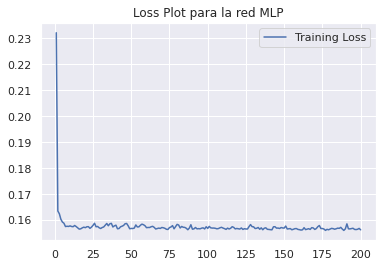

In [ ]:
acc = model1.history['accuracy']                                                # Extrae datos de trainingaccuracy del modelo de la red
loss = model1.history['loss']                                                   # Extrae datos de training loss del modelo de la red
#val_acc = model1.history['val_accuracy']                                        # Extrae datos de validation accuracy del modelo de la red
#val_lss = model1.history['val_loss']                                            # Extrae datos de validation loss del modelo de la red

epochs = range(1, len(acc)+1)                                                   # Define la cantidad de epochs a trabajar mediante un rango

plt.plot(epochs, loss, 'b', label='Training Loss')                              # Plotea el comportamiento del Training Loss con en azul su respectivo label
plt.title('Loss Plot para la red MLP')
plt.legend()
plt.show()

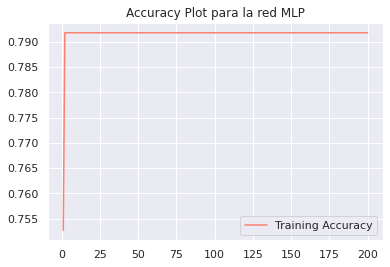

In [ ]:
plt.plot(epochs, acc, 'salmon', label='Training Accuracy')                      # Plotea el comportamiento del Testing Loss con en azul su respectivo label
plt.title('Accuracy Plot para la red MLP')
plt.legend()
plt.show()

###Importancia de los Features

Para determinar ell nivel de importancia de los features del dataframe, se utilizó una prueba del tipo $chi^2$, esta es una prueba de hipótesis que compara la distribución observada de los datos con una distribución esperada de los datos. Con esta prueba es posible determinar cuales features tienen mayor importancia al decidir qué valor binario se utiliza a la salida de la predicción por lo que a continuación se muestra:

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']                                       # Nobra el dataframe de salida
print(featureScores.nlargest(5,'Score'))                                        # Imprime los 5 mejores features

             Specs         Score
10    capital-gain  9.822875e+06
2           fnlwgt  1.032048e+05
0              Age  5.219787e+03
12  hours-per-week  4.028348e+03
4    education-num  1.429478e+03


Una vez obtenidos estos features de mayor importancia para la toma de decisiones de la red se puede proceder con la creación del árbol de decisión.

##Punto 2: Árbol de decisión

Para la sección del árbol de decisión, se comienza importando las librerías correspondientes a sklearn para arboles de decisión. De aquí importamos el Decision Tree Clasifier.

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


Lo sieguiente va a constar en la preparación de los datos. Como es solicitado, se busca una comparación con el modelo anterior, pero utilizando únicamente los 5 datos que fueron encontrados como más relevantes. Es así como se toman los conjuntos de datos x_train y x_test y se les sacan copias a las cueales se les eliminarán los datos "menos relevantes". 

In [ ]:
x_train_simplified = x_train.copy()                                             #Creación de la copia de entrenamiento
x_train_simplified.pop("sex")                                                   #Eliminación de datos
x_train_simplified.pop("ocupation")
x_train_simplified.pop("education")
x_train_simplified.pop("marital-status")
x_train_simplified.pop("relationship")
x_train_simplified.pop("race")
x_train_simplified.pop("capital-loss")
x_train_simplified.pop("native-country")
x_train_simplified.pop("workclass")
x_train_simplified.head()

x_test_simplified = x_test.copy()                                               #Creación de la copia de testeo
x_test_simplified.pop("sex")                                                     #Eliminación de features innecesarios
x_test_simplified.pop("ocupation")
x_test_simplified.pop("education")
x_test_simplified.pop("marital-status")
x_test_simplified.pop("relationship")
x_test_simplified.pop("race")
x_test_simplified.pop("capital-loss")
x_test_simplified.pop("native-country")
x_test_simplified.pop("workclass")
x_test_simplified.head()


,Age,fnlwgt,education-num,capital-gain,hours-per-week
15256,74,29887,9,0,10
17396,58,371064,9,0,20
239,23,115458,9,0,40
20445,24,153583,10,0,40
6979,63,108097,10,10566,45


Finalmente se crea el modelo de arbol de decisión, a este se le insertarán los conjuntos de entrenamiento. Luego de esto crearemos un modelo de predicciones, donde se insertará el conjunto de features de testeo y este será comprobado con los labels de testeo en un accuracy_score. 
Finalmente este accuracy se colocará en porcentaje y este será el dato a comparar con el porcentaje dado en la mlp con todos los features. 
A la hora de definir el DecisionTreeClassifier hay ciertos parámetros que permiten tener una mejor clasificación, se tienen los siguientes: 

* Criterion: Que define la calidad dela división. En este caso de usó entropy
* Splitter: Escoge la división en cada nodo, ya sea random o best, en este caso se utilizó best.
* max_depth: Define la profundidad máxima del arbol y es uno de los criterior que más varía el accuracy obtenido, el mejor resultado se obtuvo con el valor mostrado en la red, luego de varias iteraciones aumentando y disminuyendo elvalor. 
* max_features: la cantidad de features que se considera para cada división del árbol, en este caso no se colocó, puesto que el default considera todos los features que se colocan en el modelo, que es lo que se busca. 
* max_leaf_nodes : Este parametro define los nodos maximos por hoja, logrando con esto un numero limitado por hoja, en caso de dejarlo en blanco, su default generará nodos por hoja ilimitados, luego de varialo varias veces,el mejor resultado se presentó con este numero de nodos restringido a 50.

Estos fueron los parametros más importantes considerados a la hora de crear el arbol y que generaron un mejor resultado.




In [ ]:

modelo = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best',
                                max_depth = 5, max_leaf_nodes = 50)
modelo.fit(x_train_simplified,y_train)
predicciones = modelo.predict(X = x_test_simplified)

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(predicciones)
print(f"El accuracy de test es: {100 * accuracy} %")

[1 1 1 ... 1 1 1]
El accuracy de test es: 81.96071959069154 %


Como se puede observar, en comparación con la MLP, el dato de accuracy pasó de 78.26% a 81.96%, siendo incluso mejor que con todos los features que daban en el set de datos original. Esto se logró debido a que los parámetros se probaron buscando el mejor escenario posible. 
Viendo este resultado, puede decirse que los datos tomados como más importantes son suficientes para dar un resultado fiable, e incluso mejor que considerando todos los features del set de datos. También puede concluirse que la prueba y error permite encontrar parámetros en el arbol de decisión que favorezcan el accuracy, ayudando a que se obtengan buenos resultados aún con menos datos. 

##Punto 3: Clasificador de datos utilizando Random Forest

Como se solicita en el enunciado se diseña un paradigma distinto al anterior (punto 1) y por esto se selecciona el Random Forest, el cual se basa en arboles de desición para generar la clasificación de los datos.

Para la red con randomforest, se utilizan los siguientes parámetros:
 
*   **n_estimators:** se definirá un número de 1000 árboles en el forest debido a la gran cantidad de datos
*   **criterion:** después de probar ambos criterios, se determinó que entropy arroja mejores resultados para la red que se tiene
*   **max_depth:** después de múltiples pruebas con valores altos y bajos para la profundidad máxima, el valor de profundiad máxima que mejores resultados arrojó es de 50, tanto con valores  de 100 o más y de 5 o ménos se determinó que el accuracy de la red se disminuía en aproximadamente un 0.5%
*   **max_leaf_nodes:** el mejor resultado se obtuvo cuando el número de nodos en hojas se dejó en none, lo cual por defecto es un ilimitado.





In [ ]:
model3 = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', 
                                max_depth = 50)                                 # Crea el random forest con 500 árboles
model3.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=500)

In [ ]:
y_pred = model3.predict(x_test)                                                 # Realiza una predicción para un set de datos de prueba


In [ ]:
print(y_pred)

[1 1 1 ... 1 1 2]


In [ ]:
acc_3 = accuracy_score(y_test, y_pred)                                          # Evalua el resultado de dicha predicció comparando cin los valores reales
print("Accuracy: ", acc_3*100, "%")

Accuracy:  85.36062056444958 %


Por tanto se determina que de las 3 redes, la densa, el árbol de decisión y el Random Forest esta presenta los mejores resultados.

##Conclusiones


*   En la red de tipo densa, se obtuvo que para todos los posibles hiperparámetros por variar, el accuracy en la mayor parte de ellos se mantuvo constante, sin embargo el Loss si variaba, lo cual se le atribuye a la cantidad de características que debía considerar la red al clasificar los datos. Además este tipo de red tienen un gran coste computacional debido a la densidad usada.
*   Para el árbol de decisión, luego de obtener las 5 características más importantes a la hora de tomar una decisión de clasificación, se determinó que el truncar el conjunto de datos empeora de cierta forma la toma de desición, se reduce cerca del 2% de accuracy, esto debido a que los 9 datos restantes, a pesar de ser menos significativos, tienen una participación en la toma de esa decisión. Sin embargo, respecto a la red MLP se obtuvo una mejora significativa, de alrededor de un 2% en el accuracy por lo cual este tipo de paradigma, para el conjunto de datos que se tiene permite una mejor clasificación.
*   Para el conjunto de datos completo, implementado en la red RandomForest se obtuvo la mejor de todas las clasificaciones, esto gracias a que combina el buen rendimiento que demostraron tener los árboles de decisión en un gran número de ellos, por lo que posee muchas clasificaciones de las cuales se extrae un accuracy de un 85% en la clasificación, lo que representa la mejor clasificación respecto al 81% del árbol de decisión y el 79% de la red densa.

